# **Notebook for synthetic data generation**

In [1]:
# Imports
from openai import OpenAI
import os
import json
import ast
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, Counter, deque

## **Set up communication with OpenAI API**

In [ ]:
# Retrieve the system prompt
with open("prompt/data-synthetization.json", "r") as f:
    data = json.load(f)

prompt = data["prompt"]
print(prompt)

Generate a realistic and diverse list of JSON objects simulating synthetic users’ interactions with ScholéAI, an AI-powered personalized online learning platform for Data Science learners. Each object must represent both explicit feedback and implicit behavior during platform usage. The structure of each object must follow exactly the schema below:

{
  "user_id": int,
  "explicit_data": {
    "ratings_on_modules": { "module_X": int (1–5), ... },
    "approval_of_content_modifications": [
      {
        "change_id": str,
        "change": str,
        "status": "approved" | "rejected"
      }
    ],
    "explicit_learning_goals": str,
    "drag_and_drop_curriculum_edits": [
      {
        "module": str,
        "from_index": int,
        "to_index": int
      }
    ],
    "curriculum_editing_feedback": str,
    "preferred_content_format": "text" | "video" | "audio",
    "reflection_inputs": str,
    "satisfaction_surveys": {
      "overall_satisfaction": int (1–5),
      "interface_u

In [ ]:
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", "<your OpenAI API key if not set as env var>"))
model = "gpt-4o-mini"
response = client.responses.create(
    instructions=prompt,
    model=model,
    input="Generate 1 sample.",
)

response.to_dict()["output"]


[{'id': 'msg_681795ac28988191bf9eebb1d09c289d0c15dc02627e95db',
  'content': [{'annotations': [],
    'text': '```json\n{\n  "user_id": 1,\n  "explicit_data": {\n    "ratings_on_modules": { "Introduction to Data Science": 5, "Machine Learning Basics": 4, "Data Visualization": 3 },\n    "approval_of_content_modifications": [\n      {\n        "change_id": "mod123",\n        "change": "Added more examples to Data Visualization",\n        "status": "approved"\n      }\n    ],\n    "explicit_learning_goals": "To gain a solid understanding of machine learning algorithms and improve data visualization skills.",\n    "drag_and_drop_curriculum_edits": [\n      {\n        "module": "Machine Learning Basics",\n        "from_index": 1,\n        "to_index": 0\n      }\n    ],\n    "curriculum_editing_feedback": "Would prefer more practical examples and case studies.",\n    "preferred_content_format": "video",\n    "reflection_inputs": "I find it useful to see real-world applications of concepts.",

## **Extract most important concept from ScholeAI Knowledge Graph**

In [5]:
# Print skills set and relations set graphs
GRAPH_PATH = "graphs"
with open(os.path.join(GRAPH_PATH, "skills_set.txt"), "r") as f:
    skills_set = ast.literal_eval(f.read())
print("Skill set: ", skills_set, end='\n\n')
print(len(set(skills_set)))

with open(os.path.join(GRAPH_PATH, "relations_set.txt"), "r") as f:
    relations_set = ast.literal_eval(f.read())
print("Relation set: ", relations_set)

Skill set:  {'recurrent neural network', 'kernel methods', 'convolution', 'computer vision', 'model evaluation and selection', 'test error', 'software development', 'data analysis', 'normal distribution', 'accuracy', 'representation learning', 'data imputation', 'maximum likelihood estimation', 'function', 'spam detection', 'model assumptions', 'gradient ascent', 'one-hot encoding', 'dataset', 'document representation', 'bootstrapping', 'test set', 'data mining', 'density estimation', 'zero-shot learning', 'decision boundary', 'naive bayes', 'data augmentation', 'feature engineering', 'boosting', 'perceptron', 'optimization', 'interpretable models', 'data exploration', 'unsupervised learning', 'markov models', 'information criteria', 'statistics', 'support vector machines', 'binary classification', 'alternative hypothesis', 'empirical risk', 'stochastic processes', 'data visualization', 'nearest neighbor search', 'self-supervised learning', 'linear regression', 'learning algorithms', '

In [6]:
# Load relations_set as a directed graph
G = nx.DiGraph(relations_set)

# Number of nodes in the subgraph
K = 25

Top-K nodes by Betweenness Centrality:
- regression
- perceptron
- model evaluation
- classification
- data analysis
- mixture models
- probability sampling
- statistical inference
- parameter estimation
- mean squared error
- regularization
- linear regression
- convolutional neural networks
- model evaluation metrics
- neural networks
- k-means clustering
- data science
- machine learning
- expectation maximization
- statistic
- stochastic gradient descent
- linear classifier
- confidence intervals
- deep learning
- recommender systems


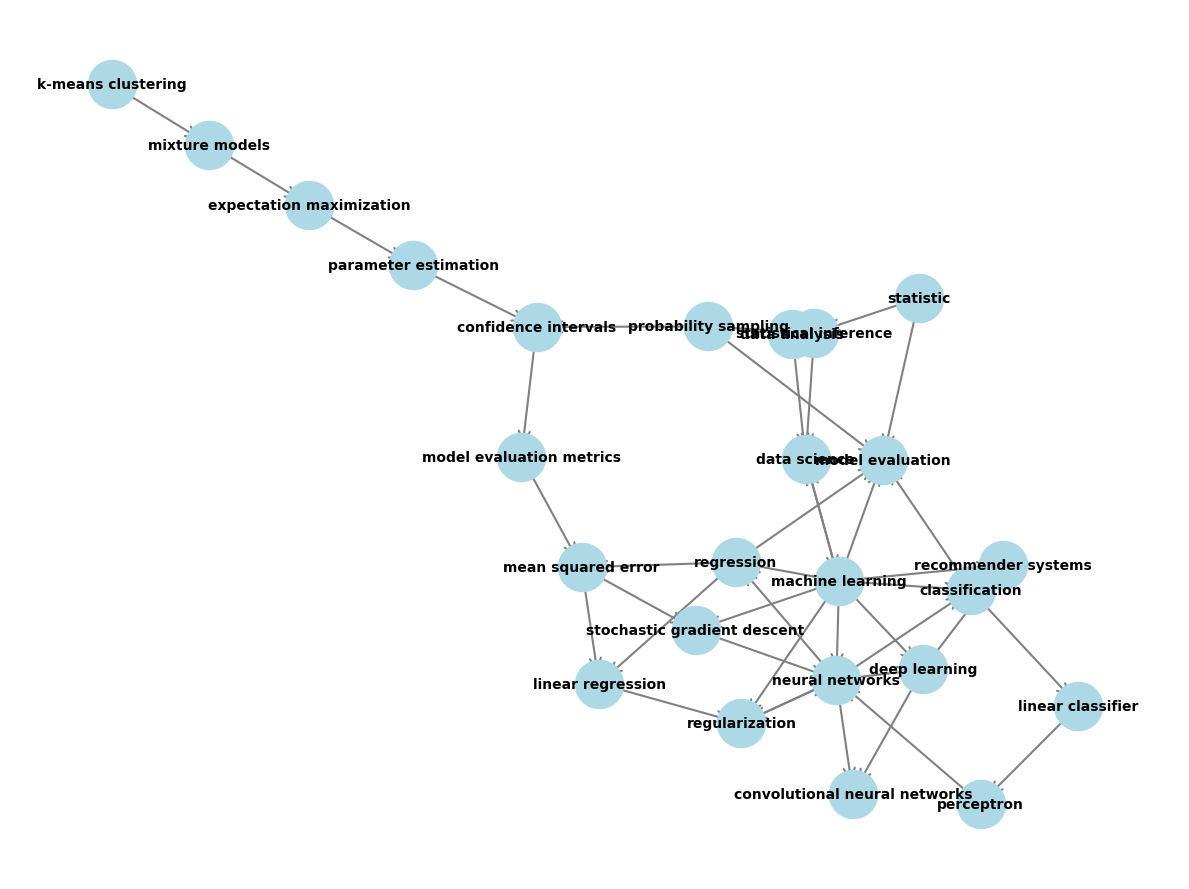

In [ ]:
# Compute Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_k_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:K]
subgraphBC = G.subgraph(top_k_nodes).copy()

# Print the top-K nodes
print("Top-K nodes by Betweenness Centrality:")
for node in subgraphBC.nodes:
    print("-", node)

plt.figure(figsize=(12, 9))
pos = nx.kamada_kawai_layout(subgraphBC)
nx.draw_networkx_nodes(subgraphBC, pos, node_size=1200, node_color="lightblue")
nx.draw_networkx_edges(subgraphBC, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=1.5)
nx.draw_networkx_labels(subgraphBC, pos, font_size=10, font_weight='bold')
plt.axis("off")
plt.tight_layout()
plt.savefig("scholeai_betweenness_summary.pdf", format='pdf')
plt.show()


confidence intervals
bias-variance tradeoff
regression
stochastic gradient descent
data visualization
model evaluation and selection
randomized experiment
mean squared error
support vector
support vector machine
logistic regression
classification
parameter estimation
model evaluation
language modeling
predictive modeling
data science
statistical significance
linear regression
hypothesis testing
neural networks
model evaluation metrics
exploratory data analysis
data analysis
cross-validation


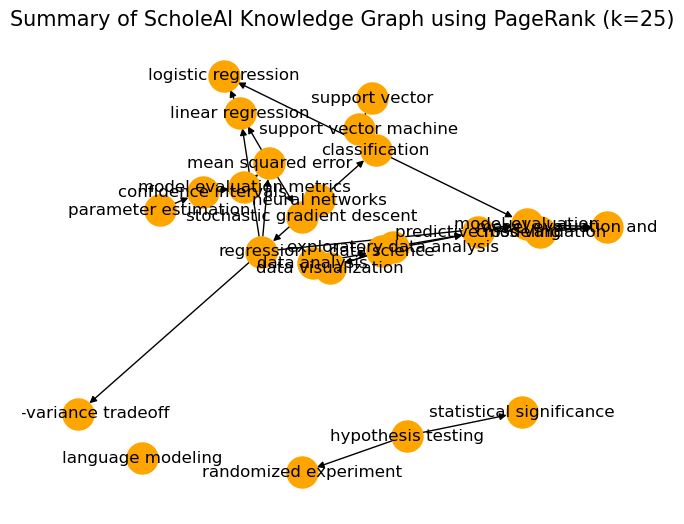

In [5]:
# PageRank
pagerank = nx.pagerank(G)
top_k_nodes = sorted(pagerank, key=pagerank.get, reverse=True)[:K]
subgraphPR = G.subgraph(top_k_nodes).copy()

# Print the nodes
for node in list(subgraphPR.nodes):
    print(node)

# Visualization
nx.draw(subgraphPR, with_labels=True, node_size=500,
        node_color="orange", arrows=True)
plt.title(f'Summary of ScholeAI Knowledge Graph using PageRank (k={K})', fontsize=15)
plt.show()

perceptron
linear classifier
regularization
mean squared error
linear regression
regression
stochastic gradient descent
least squares method
overfitting
backpropagation
classifier
neural networks
classification


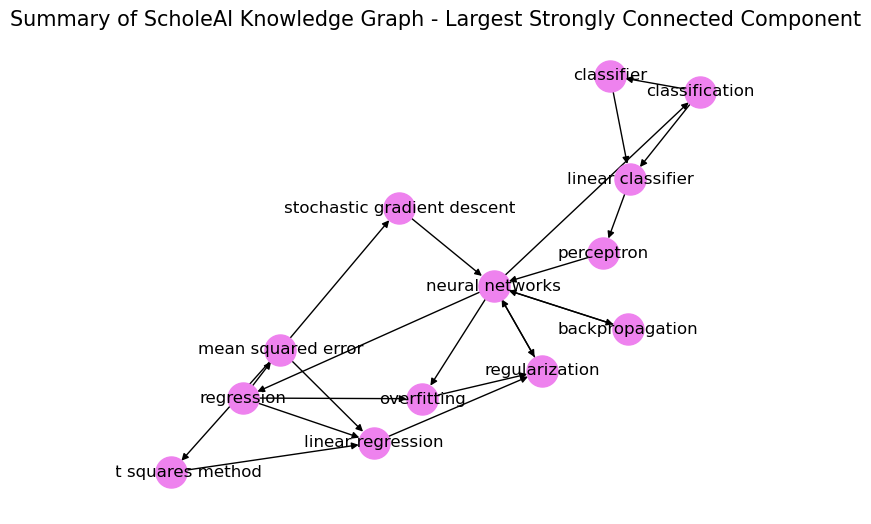

In [6]:
# Strongly connected components
sccs = list(nx.strongly_connected_components(G))
largest_scc = max(sccs, key=len)
subgraphSCC = G.subgraph(largest_scc).copy()

# Print the nodes
for node in list(subgraphSCC.nodes):
    print(node)

# Visualization
nx.draw(subgraphSCC, with_labels=True, node_size=500,
        node_color="violet", arrows=True)
plt.title('Summary of ScholeAI Knowledge Graph - Largest Strongly Connected Component', fontsize=15)
plt.show()

In [7]:
# Group edges by source node
grouped_edges = defaultdict(list)
for u, v in subgraphPR.edges():
    grouped_edges[u].append(v)

# Create string representation
edges_str = "\n".join([f"{u} -> {', '.join(map(str, v_list))}" for u, v_list in grouped_edges.items()])
print(edges_str)

# Save to file
with open(os.path.join(GRAPH_PATH, "graph.txt"), "w") as f:
    f.write(repr(edges_str))


confidence intervals -> model evaluation metrics
regression -> bias-variance tradeoff, model evaluation, mean squared error, linear regression
stochastic gradient descent -> neural networks
data visualization -> data analysis, exploratory data analysis
mean squared error -> stochastic gradient descent, linear regression
support vector machine -> support vector
classification -> logistic regression, model evaluation
parameter estimation -> confidence intervals
model evaluation -> cross-validation, model evaluation and selection
predictive modeling -> model evaluation, model evaluation and selection
data science -> predictive modeling, exploratory data analysis, data visualization
linear regression -> logistic regression
hypothesis testing -> randomized experiment, statistical significance
neural networks -> regression, classification
model evaluation metrics -> mean squared error
exploratory data analysis -> predictive modeling
data analysis -> data science, data visualization
cross-val